In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot

#To load data


In [13]:
path="rows.csv"
data=pd.read_csv(path)

In [14]:
print(f"Data shape: {data.shape}")

Data shape: (25949, 10)


##-------------1st Objective-----------##
# "Analyze Trends in Electric Vehicle Adoption Over Time"

# Clean column names

In [17]:
data.columns = data.columns.str.strip()

# Check if 'Model Year' exists (used as a time reference)

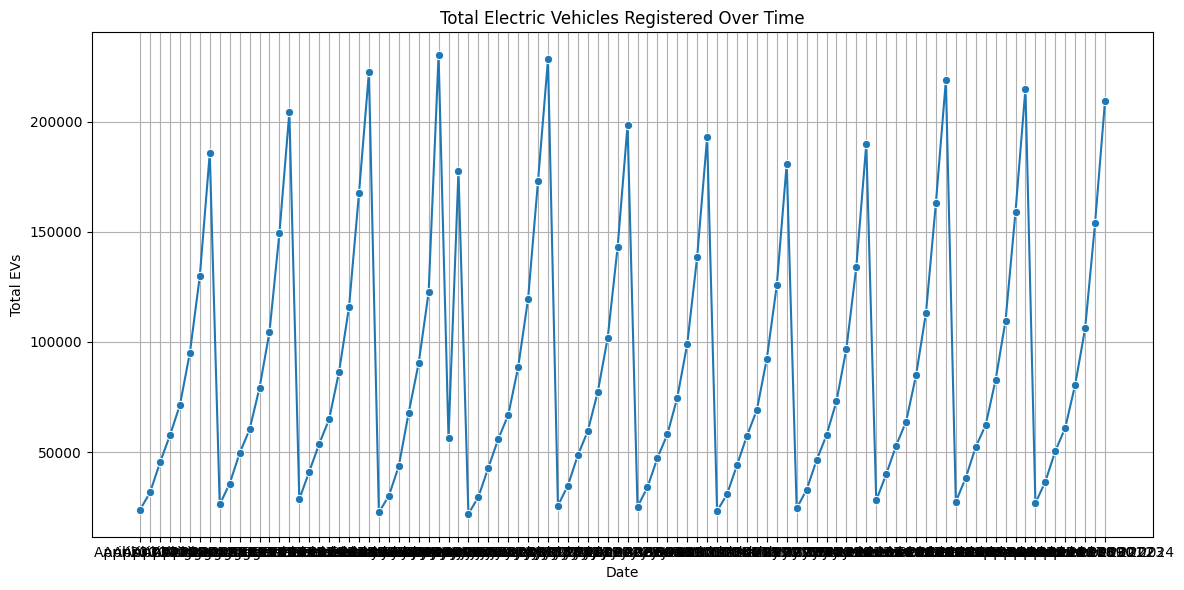

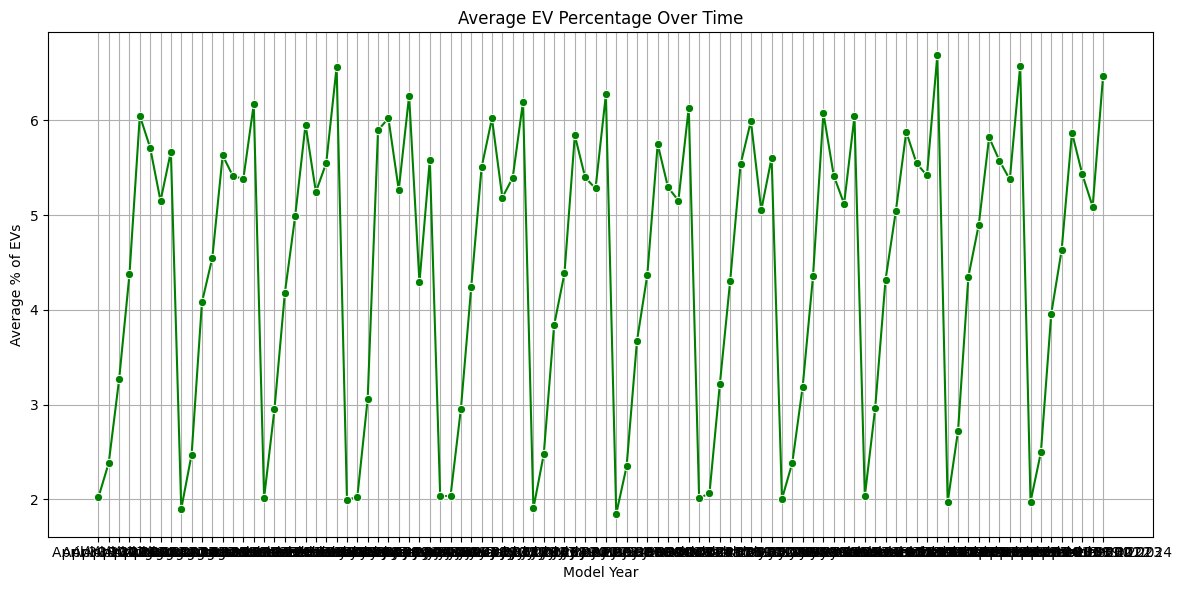

In [18]:
if 'Date' in data.columns:
    # Group by Model Year and calculate total EVs and mean % EV
    year_group = data.groupby('Date').agg({
        'Electric Vehicle (EV) Total': 'sum',
        'Percent Electric Vehicles': 'mean'
    }).reset_index()

    # Plot total EVs over years
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=year_group, x='Date', y='Electric Vehicle (EV) Total', marker='o')
    plt.title("Total Electric Vehicles Registered Over Time")
    plt.ylabel("Total EVs")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot percentage of EVs over years
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=year_group, x='Date', y='Percent Electric Vehicles', marker='o', color='green')
    plt.title("Average EV Percentage Over Time")
    plt.ylabel("Average % of EVs")
    plt.xlabel("Model Year")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Column 'Model Year' not found in your dataset.")

##---------------2nd Objective--------------##
# "Compare EV Adoption Across Counties and States"


# Drop rows with missing State or County

In [19]:
df = data.dropna(subset=['State', 'County'])

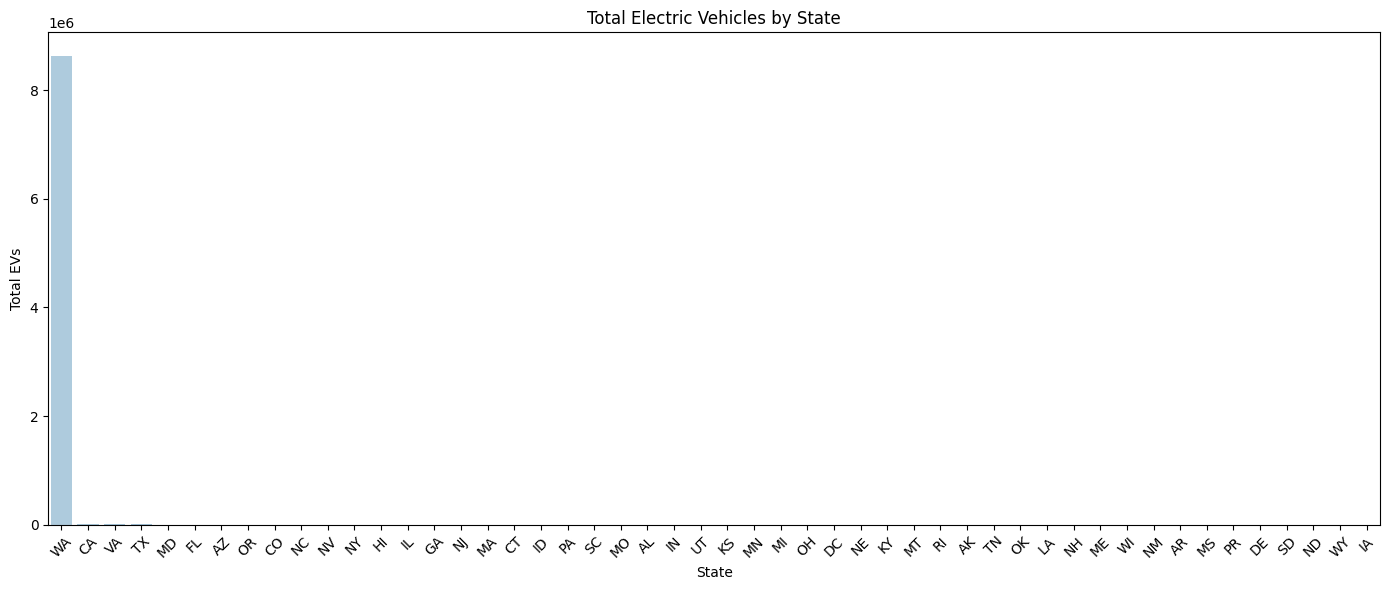

In [21]:
# ========== EV Adoption by State ==========
state_totals = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=state_totals.index, y=state_totals.values, hue=state_totals.index, palette='Blues_d', legend=False)

plt.title("Total Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Total EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== EV Adoption by County ==========
# Optional: Use only top 20 counties to keep plot readable

C:\Users\paulp\AppData\Local\Temp\ipykernel_20264\892244851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_totals.index, y=county_totals.values, palette='viridis')


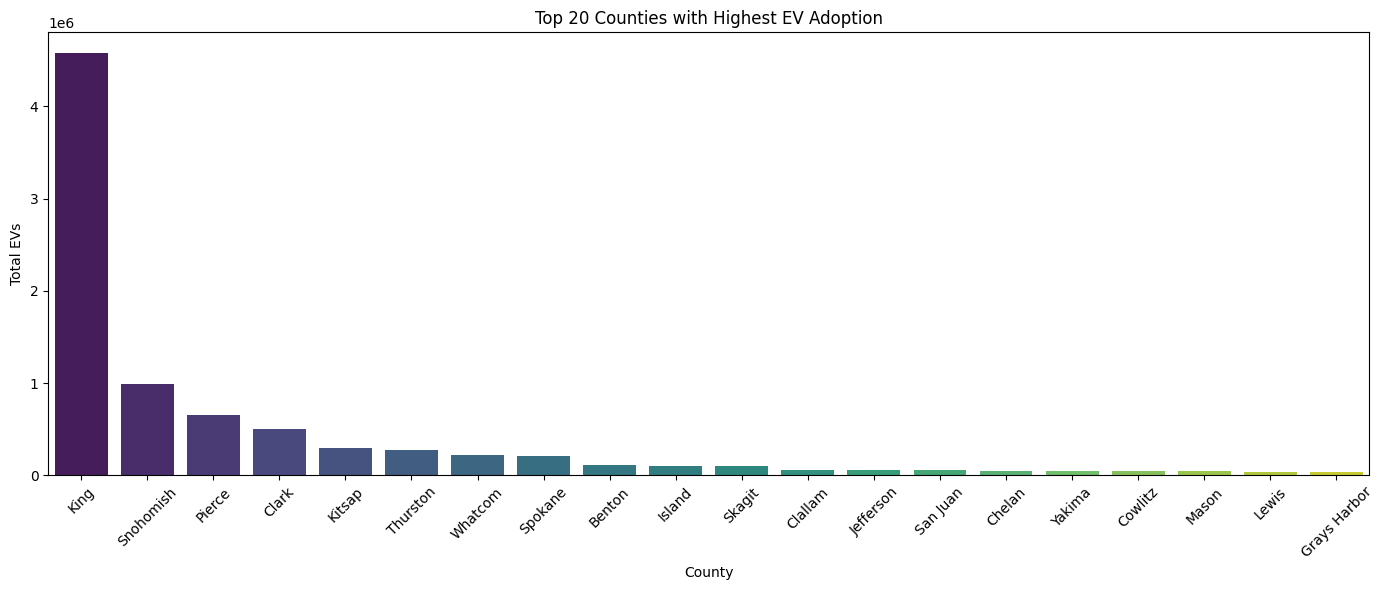

In [22]:
county_totals = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=county_totals.index, y=county_totals.values, palette='viridis')
plt.title("Top 20 Counties with Highest EV Adoption")
plt.xlabel("County")
plt.ylabel("Total EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##--------------3rd Objective-------------------##
# "Evaluate the Growth of BEVs vs. PHEVs"

Invalid dates found: 0


C:\Users\paulp\AppData\Local\Temp\ipykernel_20264\1319382290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


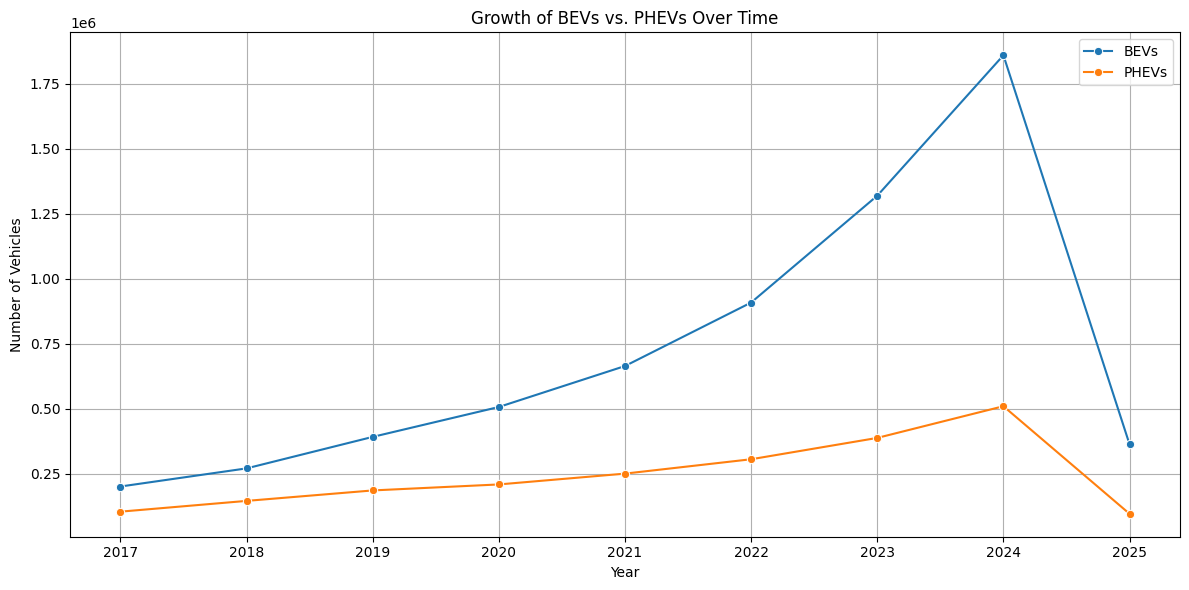

In [23]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for invalid dates and drop them
print("Invalid dates found:", df['Date'].isna().sum())
df = df.dropna(subset=['Date'])

# Drop rows with missing BEV or PHEV data
df = df.dropna(subset=['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)'])

# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Group by Year and calculate total BEVs and PHEVs
yearly_growth = df.groupby('Year').agg({
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum'
}).reset_index()

# Plot the growth of BEVs vs PHEVs over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_growth, x='Year', y='Battery Electric Vehicles (BEVs)', label='BEVs', marker='o')
sns.lineplot(data=yearly_growth, x='Year', y='Plug-In Hybrid Electric Vehicles (PHEVs)', label='PHEVs', marker='o')
plt.title('Growth of BEVs vs. PHEVs Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##---------4th Objective----------------
# "Assess the Impact of EV Adoption on Total Vehicle Composition"

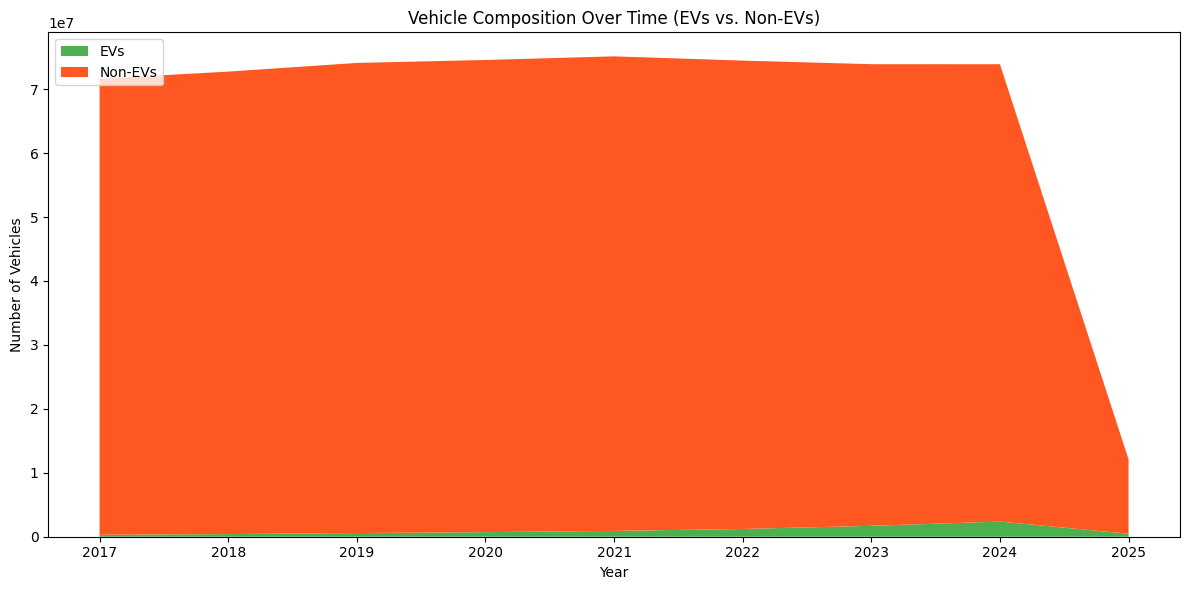

In [24]:
# Convert Date to datetime and extract Year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Electric Vehicle (EV) Total'])
df['Year'] = df['Date'].dt.year

# Option 1: If dataset has Total Vehicles column
if 'Total Vehicles' in df.columns:
    df = df.dropna(subset=['Total Vehicles'])
    df['Non-EV Vehicles'] = df['Total Vehicles'] - df['Electric Vehicle (EV) Total']

else:
    # Option 2: If dataset has Non-EV column (adjust name as needed)
    df = df.dropna(subset=['Internal Combustion Engine (ICE) Vehicle Total'])  # change to your actual column name
    df['Non-EV Vehicles'] = df['Internal Combustion Engine (ICE) Vehicle Total']
    df['Total Vehicles'] = df['Electric Vehicle (EV) Total'] + df['Non-EV Vehicles']

# Group by year
yearly = df.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-EV Vehicles': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

# Calculate EV share (%)
yearly['EV Share (%)'] = (yearly['Electric Vehicle (EV) Total'] / yearly['Total Vehicles']) * 100

# Plot EV vs Non-EV composition over years
plt.figure(figsize=(12, 6))
plt.stackplot(yearly['Year'],
              yearly['Electric Vehicle (EV) Total'],
              yearly['Non-EV Vehicles'],
              labels=['EVs', 'Non-EVs'],
              colors=['#4CAF50', '#FF5722'])
plt.title('Vehicle Composition Over Time (EVs vs. Non-EVs)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Plot EV Share (%) over time

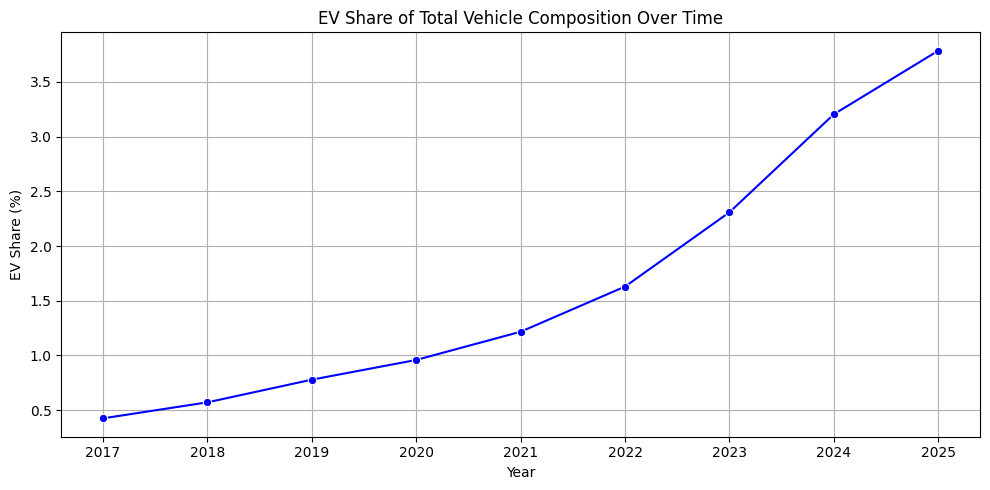

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='Year', y='EV Share (%)', marker='o', color='blue')
plt.title('EV Share of Total Vehicle Composition Over Time')
plt.ylabel('EV Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

##------------5th Objective---------------##
# Identify Correlations Between EV Adoption and Vehicle Primary Use

<Figure size 1400x600 with 0 Axes>

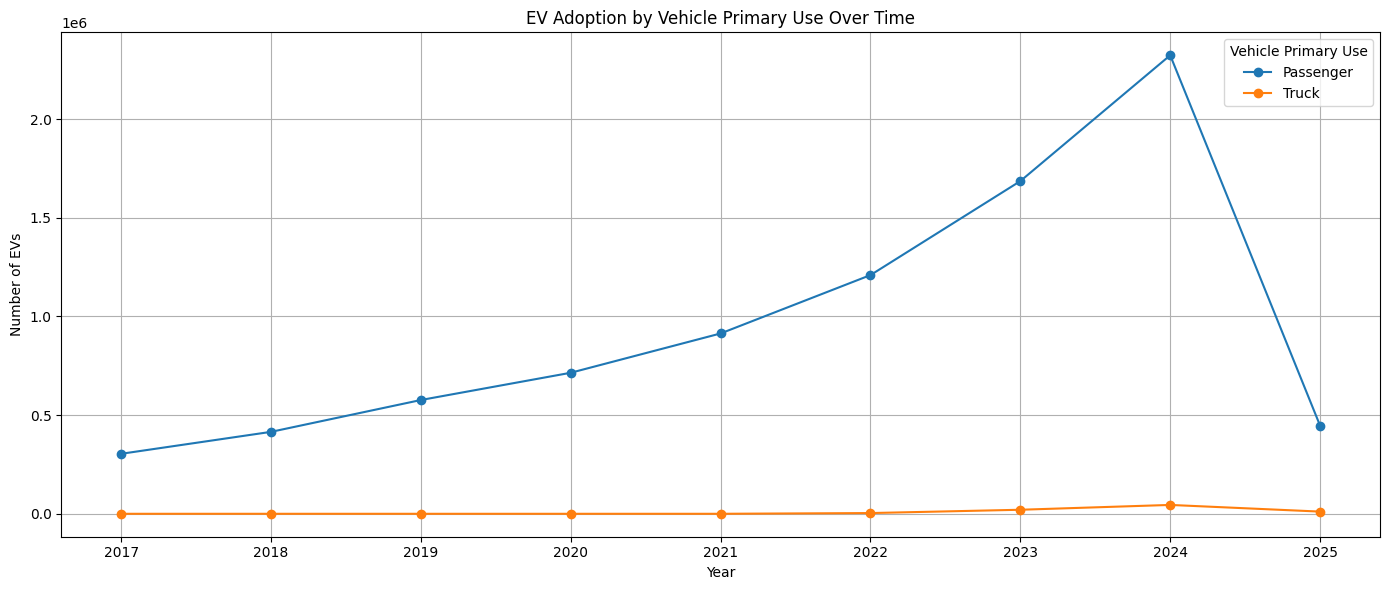

In [26]:
# Convert Date to datetime and extract Year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Electric Vehicle (EV) Total', 'Vehicle Primary Use'])
df['Year'] = df['Date'].dt.year

# Group by Primary Use and Year (optional: remove year if not needed)
grouped = df.groupby(['Vehicle Primary Use', 'Year']).agg({
    'Electric Vehicle (EV) Total': 'sum'
}).reset_index()

# Pivot for visualization
pivot_data = grouped.pivot(index='Year', columns='Vehicle Primary Use', values='Electric Vehicle (EV) Total')
pivot_data = pivot_data.fillna(0)

# Plot EV Adoption by Primary Use over Years
plt.figure(figsize=(14, 6))
pivot_data.plot(kind='line', marker='o', figsize=(14, 6))
plt.title('EV Adoption by Vehicle Primary Use Over Time')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.legend(title='Vehicle Primary Use')
plt.tight_layout()
plt.show()

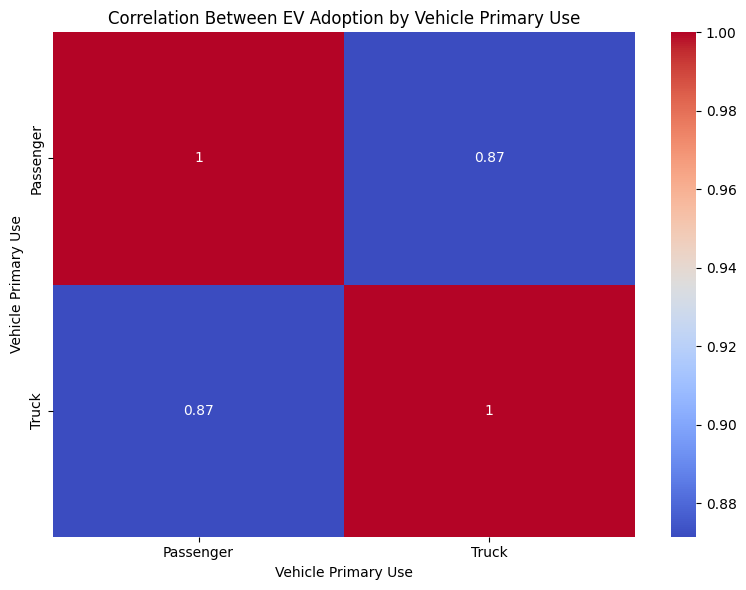

In [27]:
# Optional: Correlation heatmap across primary uses
correlation = pivot_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between EV Adoption by Vehicle Primary Use')
plt.tight_layout()
plt.show()